In [168]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED


def calculate_lipinski_properties(smiles):
    # Create a molecule object from the SMILES string
    mol = Chem.MolFromSmiles(smiles)

    # Calculate the Lipinski properties
    molecular_weight = Descriptors.MolWt(mol)
    num_hydrogen_bond_donors = Descriptors.NumHDonors(mol)
    num_hydrogen_bond_acceptors = Descriptors.NumHAcceptors(mol)
    logp = Descriptors.MolLogP(mol)
    qed_value = QED.qed(mol)
    
    # Determine if the molecule satisfies Lipinski's Rule of Five
    is_pass = (
        molecular_weight <= 500 and
        num_hydrogen_bond_donors <= 5 and
        num_hydrogen_bond_acceptors <= 10 and
        logp <= 5
    )

    # Return the Lipinski properties as a dictionary
    lipinski_properties = {
        'MW': molecular_weight,
        'HBD': num_hydrogen_bond_donors,
        'HBA': num_hydrogen_bond_acceptors,
        'LogP': logp,
        'QED': qed_value
    }

    return lipinski_properties

In [117]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
def create_bar_chart(lipinski_properties, title):
    # Extract the property names and values from the dictionary
    properties = list(lipinski_properties.keys())
    values = list(lipinski_properties.values())

    # Set the font properties
    font_path = fm.findfont(fm.FontProperties(family='Arial'))
    font_prop = fm.FontProperties(fname=font_path, size=6)

    # Create subplots with tight layout
    fig, ax = plt.subplots(figsize=(3, 2), tight_layout=True)

    # Create a bar chart
    ax.bar(properties, values, color='grey')

    # Set the x-axis label rotation
    plt.xticks(rotation=45, ha='right')

    # Set the labels and title
    ax.set_xlabel('Lipinski Property', fontproperties=font_prop)
    ax.set_ylabel('Value', fontproperties=font_prop)
    ax.set_title('Lipinski Properties', fontproperties=font_prop)

    # Set the font size for tick labels
    ax.tick_params(axis='both', labelsize=6)
    ax.set_yscale('log')
    # Display the chart
    plt.savefig(title, dpi=900, bbox_inches=0)

In [299]:
import matplotlib.pyplot as plt
import numpy as np


def create_radar_plot(lipinski_properties, min_values, max_values, title, color):
    # Extract the property names and values from the dictionary
    properties = list(lipinski_properties.keys())
    values = list(lipinski_properties.values())

    # Normalize the values to the range of 0 to 1 using the provided minimum and maximum values
    normalized_values = [(value - min_val) / (max_val - min_val) for value, min_val, max_val in zip(values, min_values, max_values)]

    # Create a list of angles for each property
    angles = np.linspace(0, 2 * np.pi, len(properties), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    # Create a list of values for each property
    normalized_values += normalized_values[:1]  # Close the loop

    # Number of radial ticks
    num_ticks = 3

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(1.5, 1.5), subplot_kw={'projection': 'polar'})
    ax.fill(angles, normalized_values, color=color, alpha=0.6)

    # Set the labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(properties, fontsize=6, fontfamily='arial')
    print(np.linspace(min_values[0], max_values[0], num_ticks))
    print(np.linspace(min_values[1], max_values[1], num_ticks))
    print(np.linspace(min_values[2], max_values[2], num_ticks))
    print(np.linspace(min_values[3], max_values[3], num_ticks))
    print(np.linspace(min_values[4], max_values[4], num_ticks))

    ax.set_yticks(np.linspace(0, 1, num_ticks))  # Set the radial ticks to 5 evenly spaced values from 0 to 1
    ax.set_yticklabels([])  # Show corresponding y-axis labels

    # Display the plot
    plt.tight_layout()
    plt.savefig(title, dpi=900, bbox_inches=0)
    plt.show()

In [339]:
min_values = [0, 0, 0, -2, 0]
max_values = [1000, 10, 20, 12, 1]

In [340]:
out1 = calculate_lipinski_properties("FC1=CC(C[C@H](N)CC(N2CCN3C(C2)=NN=C3C(F)(F)F)=O)=C(F)C=C1F")

In [341]:
print(out1)

{'MW': 407.318, 'HBD': 1, 'HBA': 5, 'LogP': 2.0164999999999997, 'QED': 0.6216377742511344}


[   0.  500. 1000.]
[ 0.  5. 10.]
[ 0. 10. 20.]
[-2.  5. 12.]
[0.  0.5 1. ]


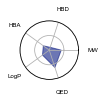

In [342]:
create_radar_plot(out1, min_values, max_values, "januvia.png", "#0B1B82")

In [343]:
out2 = calculate_lipinski_properties("ClC1=CC(NC2=C3C(C=C(OC)C(OCCCN4CCOCC4)=C3)=NC=N2)=CC=C1F")

[   0.  500. 1000.]
[ 0.  5. 10.]
[ 0. 10. 20.]
[-2.  5. 12.]
[0.  0.5 1. ]


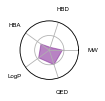

In [344]:
create_radar_plot(out2, min_values, max_values, "gefitinib.png", "#89319C")

In [345]:
out3 = calculate_lipinski_properties("O[C@@H]1CC[C@@H](C[C@H]([C@@H]2CC([C@@H](/C=C([C@H]([C@H](C([C@@H](C[C@@H](/C=C/C=C/C=C([C@H](C[C@@H]3CC[C@H]([C@@](O3)(C(C(N4CCCC[C@H]4C(O2)=O)=O)=O)O)C)OC)\C)C)C)=O)OC)O)\C)C)=O)C)C[C@H]1OC")

[   0.  500. 1000.]
[ 0.  5. 10.]
[ 0. 10. 20.]
[-2.  5. 12.]
[0.  0.5 1. ]


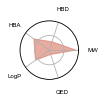

In [346]:
create_radar_plot(out3,min_values, max_values,"rapamycin.png", "#D97461")

In [347]:
out4 = calculate_lipinski_properties("O=C(NS(C1=CC(S(=O)(C(F)(F)F)=O)=C(N[C@H](CCN2CCOCC2)CSC3=CC=CC=C3)C=C1)(=O)=O)C(C=C4)=CC=C4N(CC5)CCN5CC(C6)=C(C7=CC=C(Cl)C=C7)CCC6(C)C")

[   0.  500. 1000.]
[ 0.  5. 10.]
[ 0. 10. 20.]
[-2.  5. 12.]
[0.  0.5 1. ]


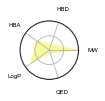

In [348]:
create_radar_plot(out4, min_values, max_values, "navitoclax.png", "#F2F758")

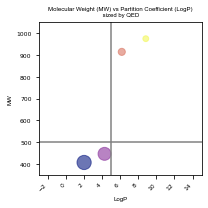

In [349]:
font_path = fm.findfont(fm.FontProperties(family='Arial'))
font_prop = fm.FontProperties(fname=font_path, size=6)

# Create subplots with tight layout
fig, ax = plt.subplots(figsize=(3, 3), tight_layout=True)

# Create a bar chart

properties = [out1["LogP"], out2["LogP"], out3["LogP"], out4["LogP"]]
values = [out1["MW"], out2["MW"], out3["MW"], out4["MW"]]
n = 325
size = [out1["QED"]*n, out2["QED"]*n, out3["QED"]*n, out4["QED"]*n]


ax.scatter(properties, values, color=["#0B1B82", "#89319C", "#D97461", "#F2F758"], s=size, alpha=0.6)

# Set the x-axis label rotation
plt.xticks(rotation=45, ha='right')

# Set the labels and title
ax.set_xlabel('LogP', fontproperties=font_prop)
ax.set_ylabel('MW', fontproperties=font_prop)
ax.set_title('Molecular Weight (MW) vs Partition Coefficient (LogP)\n sized by QED', fontproperties=font_prop)

ax.vlines(5, ymin=0, ymax=1050, color='gray')
ax.set_ylim([350, 1050])

ax.hlines(500, xmin=-3, xmax=15, color='gray')
ax.set_xlim([-3, 15])


# Set the font size for tick labels
ax.tick_params(axis='both', labelsize=6)
# ax.set_yscale('log')
# Display the chart
plt.savefig("scatter.png", dpi=900, bbox_inches=0)